# **Project 2**
## **Abbas Paryavi**

In [48]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sqlite_file = 'lahman2014.sqlite'
sql_conn = sqlite3.connect(sqlite_file)

## **Part 1: Wrangling**
### **Problem 1**

I think some of the more important pieces of data were:

Winning Percentage, Payroll, Number of Wins and Losses, Number of Games, Year and of course the Team ID.

I selected the rows of data that I needed (listed above) from each table using sql. The payroll came from the Salaries table but all the others were from the Teams table. For the winning percentage and payroll, I them for each teamID and yearID combination.
I used left join to join the two tables (Salaries and Teams). This also helped me with the missing data. There were some unavailable data in the Salaries table, but using left join, it took care of all the missing information by joining the Salaries and Team tables.

In [3]:
# SQL command to query data from Salaries and Teams tables and join them together
teams_query = """SELECT Teams.teamID AS Team_ID, Teams.yearID AS Year, Teams.franchID AS Franchise_ID, Teams.W AS Number_of_Wins, Teams.L AS Number_of_Loses, Teams.G AS Number_of_Games,  (CAST(Teams.W AS float)/ CAST(Teams.G AS float) * 100) AS Winning_Percentage, total_payroll FROM 
(SELECT SUM(salary) AS Total_Payroll, yearID, teamID, lgID FROM Salaries GROUP BY teamID, yearID) B LEFT JOIN Teams ON Teams.teamID = B.teamID AND Teams.yearID = B.yearID"""

teams = pd.read_sql(teams_query, sql_conn)
teams

Team_ID    Year Franchise_ID  Number_of_Wins  Number_of_Loses  \
0       ATL  1985.0          ATL            66.0             96.0   
1       BAL  1985.0          BAL            83.0             78.0   
2       BOS  1985.0          BOS            81.0             81.0   
3       CAL  1985.0          ANA            90.0             72.0   
4       CHA  1985.0          CHW            85.0             77.0   
..      ...     ...          ...             ...              ...   
855     SLN  2014.0          STL            90.0             72.0   
856     TBA  2014.0          TBD            77.0             85.0   
857     TEX  2014.0          TEX            67.0             95.0   
858     TOR  2014.0          TOR            83.0             79.0   
859     WAS  2014.0          WSN            96.0             66.0   

     Number_of_Games  Winning_Percentage  Total_Payroll  
0              162.0           40.740741     14807000.0  
1              161.0           51.552795     11560712.0  
2              163.0           49.693252     10897560.0  
3              162.0           55.555556     14427894.0  
4              163.0           52.147239      9846178.0  
..               ...                 ...            ...  
855            162.0           55.555556    120693000.0  
856            162.0           47.530864     72689100.0  
857            162.0           41.358025    112255059.0  
858            162.0           51.234568    109920100.0  
859            162.0           59.259259    131983680.0  

[860 rows x 8 columns]

## **Part 2: Exploratory Data Analysis**
### **Problem 2**

Text(0.5, 1.0, 'Total Payroll vs Year')

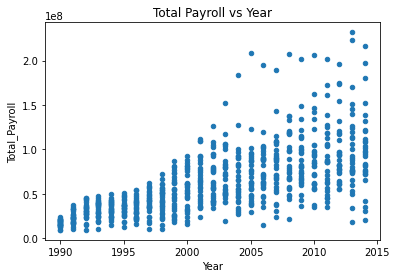

In [4]:
# Scatter plot spending of teams every year(1990- 2014).
teams.loc[teams['Year'] >= 1990].plot.scatter(y = 'Total_Payroll', x = 'Year').set_title('Total Payroll vs Year')

### **Question 1**
Based on the graph we can see that the total payroll has increased over the years 1990-2014 or more like a negative skewness. This means that the total payroll has been increasing on average (central tendancy) throughout these years.

We also see less outliers in the first 10 years, that might be due to the fact that, even if there was any outliers it wouldn't show itself as much concidering the amount of growth the payrolls have had.

### **Problem 3**
I made a plot of the average total payroll per year to show the central tendancy of the payroll.

We can easily see that the average total payroll is increasing every year at a relatively constant rate. This can be due to any reason, be it inflation or just the sport being injected with more money with more fame and supporters.

Text(0.5, 1.0, 'Average Payroll vs Year')

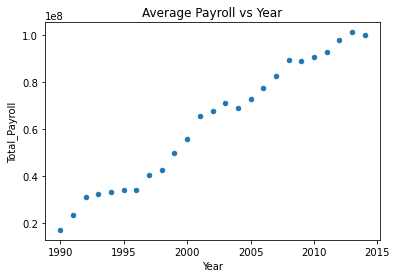

In [5]:
# First copy all the teams data into a new dataframe called teams_average so the changes won't affect the actual data.
# Then add a new column called the Year_ID to group the data by it then get the mean of the payroll and do a scatter plot on it.
teams_average = teams.copy()
teams_average['Year_ID'] = teams_average['Year']
teams_average = teams_average.loc[teams_average['Year_ID'] >= 1990].groupby('Year_ID').mean()
teams_average.plot.scatter(y = 'Total_Payroll', x = 'Year').set_title('Average Payroll vs Year')

### **Problem 4**

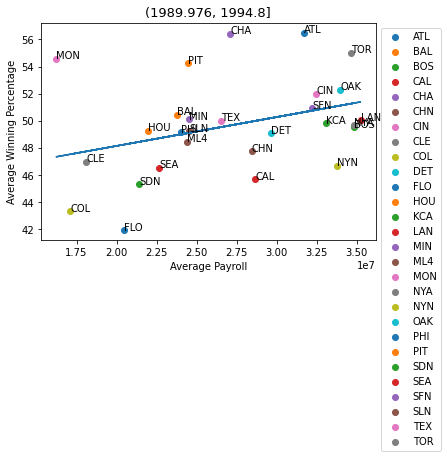

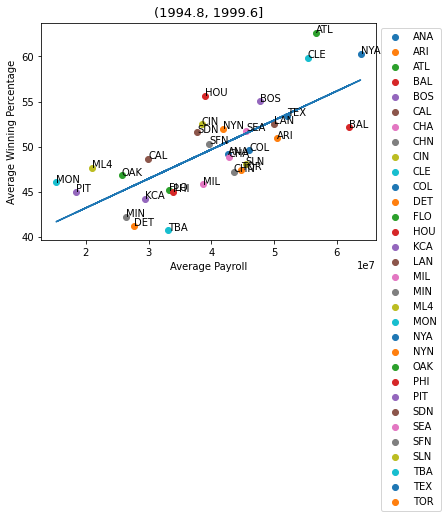

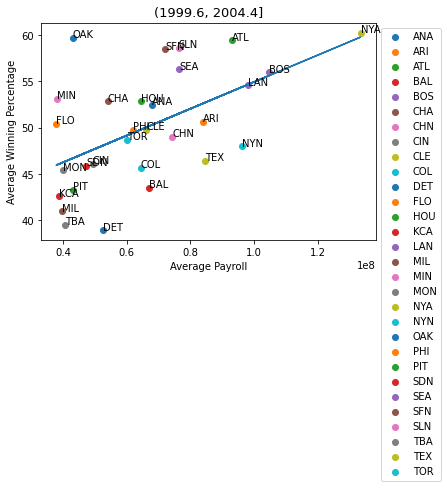

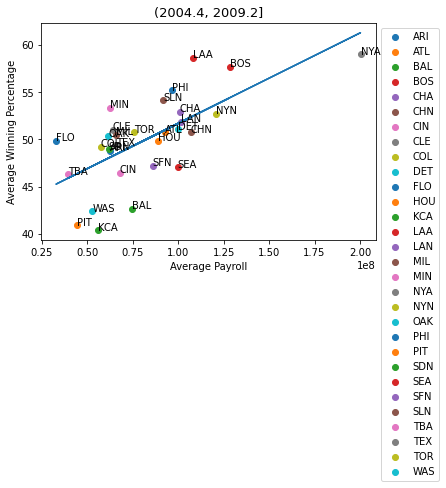

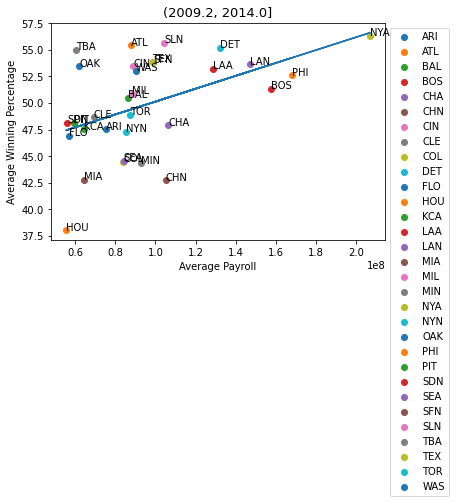

In [6]:
# First copy the data into a new dataframe so all the changes won't effect our original data.
# Then cut the data into 5 equivalent pieces based on Year.
# Then group them by periods.
teams_winning_payroll = teams.loc[teams['Year'] >= 1990].copy()
teams_winning_payroll['periods'] = pd.cut(teams_winning_payroll['Year'],5)
teams_winning_payroll_plot = teams_winning_payroll.groupby(['periods'])

# Make separate plot for each of the 5 time periods by iterating through them.
for i, gp in teams_winning_payroll_plot:
    fig, ax = plt.subplots()
    x_pos = []
    y_pos = []
    
    # group each time period by Team_ID and iterate through it.
    for i2, gp2 in gp.groupby(['Team_ID']):
        # get the mean of total payroll and winning percentage to use later
        payroll_mean = gp2['Total_Payroll'].mean()
        winning_mean = gp2['Winning_Percentage'].mean()
        # Append teams total_payroll and winning percentage respectively later used for regression line.
        x_pos.append(payroll_mean)
        y_pos.append(winning_mean)
        
        # do a scatter plot with x-axis being the mean of payroll and y-axis being mean of winning, also add label
        ax.scatter(x=payroll_mean, y=winning_mean, label = gp2.iloc[0,0])
        # Annotate the plot by team name
        ax.annotate(gp2.iloc[0,0], (payroll_mean, winning_mean))
        
    ax.set_title(i, fontsize=13)
    ax.set_ylabel('Average Winning Percentage')
    ax.set_xlabel('Average Payroll')
    
    # plot regression line
    m, b = np.polyfit(np.array(x_pos), np.array(y_pos), 1)
    plt.plot(np.array(x_pos), m*np.array(x_pos)+b)
    # put legend based on team name
    plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### **Question 2**
One thing we can see is that the winning rate vs payroll changes constantly through time. But we can definetly say that the winning rate usually increases based on payroll all throughout these years, however, I would expect the payroll to have a larger effect but even though it does increase the average winning rate in the years 1990-1995 it did not have a drastic effect as we can see based on the regression line. We can best see the correlation between payroll and winning rate in years 1995-2000 where teams with lower salaries didn't get nearly as good results as teams with higher salaries. This correlation is also good in years 2005-2010.

However, this does not mean that teams with lower payroll have not gotten good results. We can infact see many teams throughout these periods getting results with much lower payrolls. From years 1990-1995 team MON was in the top 5 in winning rate with the absolute lowest salary. In years 2000-2005 teams were not too good with spending efficiently, because teams with higher salaries got better results. In years 2000-2005 OAK was probably the best with spending efficiency getting second place in terms of winning rate and having close to a third of the spending of the highest. In years 2005-2010 again teams were not that efficient in there spending. However, in the last five years (2010-2015), teams like TBA, OAK, ATL were omongst the most efficient of those years having low spendings ang getting good results. However, NYA has consistantly been one of the highest payers and has also consistently gotten good results.

OAK have not been consistant throught this entire timeline, but they have been one of the better teams in terms spending efficiency after the year 2000. Before that, however, in years 1990-1995, they were among the high spenders and they were only 6th in winning rate. And in years 1995-2000 they were among the lowest spenders and they also got very poor results. However, from years 2000-2005 and 2010-2015, they have managed to get very good results with low wages. They're best years were from 2000-2005 becoming 2nd in winning rate, while having one of the lowest spendings.

### **Problem 5**

In [7]:
teams_winning_payroll

Team_ID    Year Franchise_ID  Number_of_Wins  Number_of_Loses  \
130     ATL  1990.0          ATL            65.0             97.0   
131     BAL  1990.0          BAL            76.0             85.0   
132     BOS  1990.0          BOS            88.0             74.0   
133     CAL  1990.0          ANA            80.0             82.0   
134     CHA  1990.0          CHW            94.0             68.0   
..      ...     ...          ...             ...              ...   
855     SLN  2014.0          STL            90.0             72.0   
856     TBA  2014.0          TBD            77.0             85.0   
857     TEX  2014.0          TEX            67.0             95.0   
858     TOR  2014.0          TOR            83.0             79.0   
859     WAS  2014.0          WSN            96.0             66.0   

     Number_of_Games  Winning_Percentage  Total_Payroll             periods  
130            162.0           40.123457     14555501.0  (1989.976, 1994.8]  
131            161.0           47.204969      9680084.0  (1989.976, 1994.8]  
132            162.0           54.320988     20558333.0  (1989.976, 1994.8]  
133            162.0           49.382716     21720000.0  (1989.976, 1994.8]  
134            162.0           58.024691      9491500.0  (1989.976, 1994.8]  
..               ...                 ...            ...                 ...  
855            162.0           55.555556    120693000.0    (2009.2, 2014.0]  
856            162.0           47.530864     72689100.0    (2009.2, 2014.0]  
857            162.0           41.358025    112255059.0    (2009.2, 2014.0]  
858            162.0           51.234568    109920100.0    (2009.2, 2014.0]  
859            162.0           59.259259    131983680.0    (2009.2, 2014.0]  

[728 rows x 9 columns]

In [8]:
std_payroll = []

# create STD_Payroll column
teams_winning_payroll['STD_Payroll'] = teams_winning_payroll['Total_Payroll']
# group the data by periods and iterate through it
x = teams_winning_payroll.groupby('periods')
for i, gp in x:
    # get the mean and standard deviation of the total payroll
    average = gp['Total_Payroll'].mean()
    std = gp['Total_Payroll'].std()
    
    # apply the equatin to each row in the STD_Payroll column
    x = gp['STD_Payroll'].apply(lambda x: (x - average) / std)
    # append each to the std_payroll to add to STD_Payroll at the end
    for i in x:
        std_payroll.append(i)

# update STD_Payroll column with correct values
teams_winning_payroll['STD_Payroll'] = std_payroll
teams_winning_payroll

Team_ID    Year Franchise_ID  Number_of_Wins  Number_of_Loses  \
130     ATL  1990.0          ATL            65.0             97.0   
131     BAL  1990.0          BAL            76.0             85.0   
132     BOS  1990.0          BOS            88.0             74.0   
133     CAL  1990.0          ANA            80.0             82.0   
134     CHA  1990.0          CHW            94.0             68.0   
..      ...     ...          ...             ...              ...   
855     SLN  2014.0          STL            90.0             72.0   
856     TBA  2014.0          TBD            77.0             85.0   
857     TEX  2014.0          TEX            67.0             95.0   
858     TOR  2014.0          TOR            83.0             79.0   
859     WAS  2014.0          WSN            96.0             66.0   

     Number_of_Games  Winning_Percentage  Total_Payroll             periods  \
130            162.0           40.123457     14555501.0  (1989.976, 1994.8]   
131            161.0           47.204969      9680084.0  (1989.976, 1994.8]   
132            162.0           54.320988     20558333.0  (1989.976, 1994.8]   
133            162.0           49.382716     21720000.0  (1989.976, 1994.8]   
134            162.0           58.024691      9491500.0  (1989.976, 1994.8]   
..               ...                 ...            ...                 ...   
855            162.0           55.555556    120693000.0    (2009.2, 2014.0]   
856            162.0           47.530864     72689100.0    (2009.2, 2014.0]   
857            162.0           41.358025    112255059.0    (2009.2, 2014.0]   
858            162.0           51.234568    109920100.0    (2009.2, 2014.0]   
859            162.0           59.259259    131983680.0    (2009.2, 2014.0]   

     STD_Payroll  
130    -1.316941  
131    -1.810947  
132    -0.708700  
133    -0.590993  
134    -1.830055  
..           ...  
855     0.578298  
856    -0.566682  
857     0.377038  
858     0.321345  
859     0.847601  

[728 rows x 10 columns]

### **Problem 6**

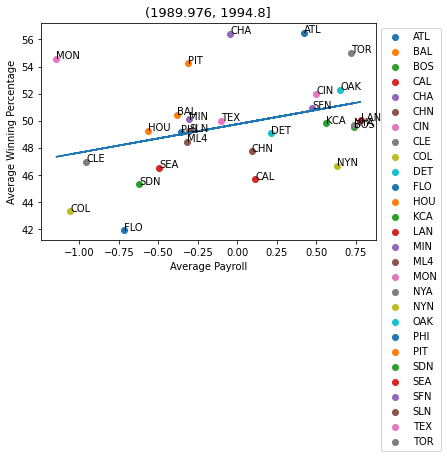

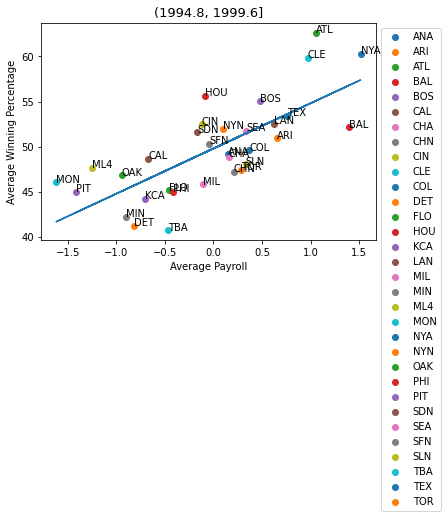

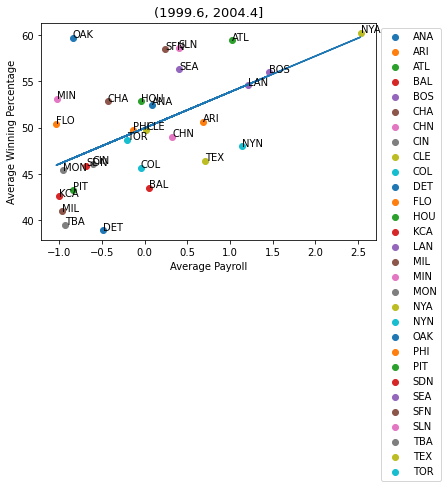

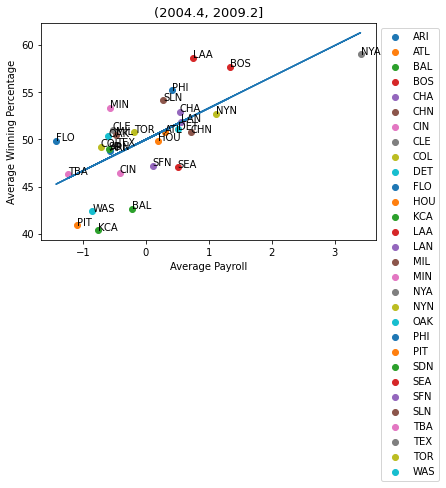

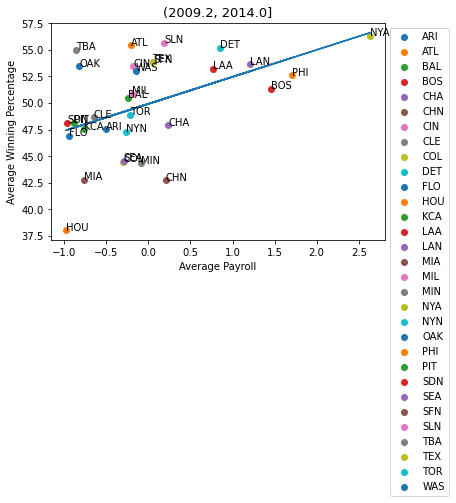

In [9]:
# group data by periods.
teams_winning_stdpayroll_plot = teams_winning_payroll.groupby(['periods'])

# Make separate plot for each of the 5 time periods by iterating through them.
for i, gp in teams_winning_stdpayroll_plot:
    fig, ax = plt.subplots()
    x_pos = []
    y_pos = []
    
    # group each time period by Team_ID and iterate through it.
    for i2, gp2 in gp.groupby(['Team_ID']):
        # get the mean of std payroll and winning percentage to use later
        stdpayroll_mean = gp2['STD_Payroll'].mean()
        winning_mean = gp2['Winning_Percentage'].mean()
        # Append teams total_payroll and winning percentage respectively later used for regression line.
        x_pos.append(stdpayroll_mean)
        y_pos.append(winning_mean)
        
        # do a scatter plot with x-axis being the mean of payroll and y-axis being mean of winning, also add label
        ax.scatter(x=stdpayroll_mean, y=winning_mean, label = gp2.iloc[0,0])
        # Annotate the plot by team name
        ax.annotate(gp2.iloc[0,0], (stdpayroll_mean, winning_mean))
        
    ax.set_title(i, fontsize=13)
    ax.set_ylabel('Average Winning Percentage')
    ax.set_xlabel('Average Payroll')
    
    # plot regression line
    m, b = np.polyfit(np.array(x_pos), np.array(y_pos), 1)
    plt.plot(np.array(x_pos), m*np.array(x_pos)+b)
    # put legend based on team name
    plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### **Question 3**
The two plots from Problem 4 and 6 are very similar, with a slight difference. The data on Problem 6 are centered closer to 0 thus it makes it easier to compare values. This is because, when we standardize the data we are comparing it to the mean of the data. In this case the mean is the average total payroll. Thus data on he 0 mark mean the they are exactly on the average thus making it easier to compare.

### **Problem 7**

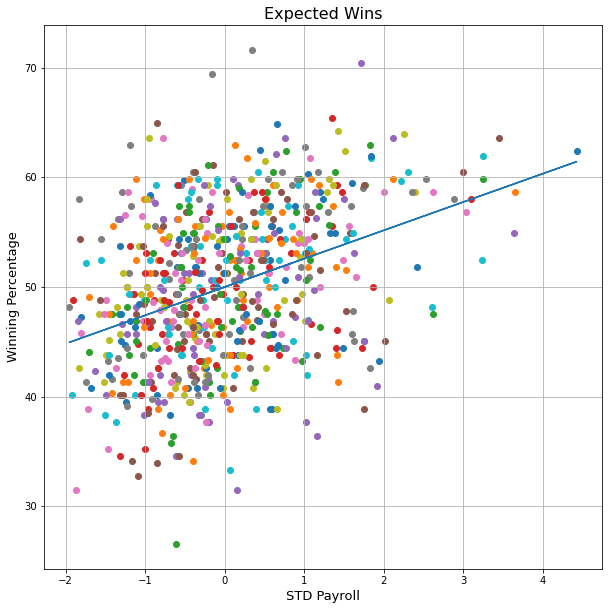

In [10]:
# made the plot similar to the ones I have done above, except we only have one thus we don't group the data by periods
# Adds a regression line to highlight the relationship.
x_pos = []
y_pos = []
fig, ax = plt.subplots(figsize=(10,10))    
ax.set_title('Expected Wins', fontsize=16)
ax.set_ylabel('Winning Percentage', fontsize=13)
ax.set_xlabel('STD Payroll', fontsize=13)
for i, gp in teams_winning_payroll.groupby(['Team_ID']):  
    for i2, gp2 in gp.groupby(['Year']):
        stdpayroll_mean = gp2['STD_Payroll'].mean()
        winning_mean = gp2['Winning_Percentage'].mean()
        x_pos.append(stdpayroll_mean)
        y_pos.append(winning_mean)
        ax.scatter(x=stdpayroll_mean, y=winning_mean)
    ax.grid()
    
m, b = np.polyfit(np.array(x_pos), np.array(y_pos), 1)
plt.plot(np.array(x_pos), m*np.array(x_pos)+b)
plt.show()

### **Expected_Win_PCT**
We use the formula provided to calculate the exptected_win_pct = 50 + 2.5 * standardized_payroll.

In [11]:
# apply the equation to the std_payroll column using apply and lambda then set the new column Expected_Win_PCT to the result of the equation
exptected_win_pct = teams_winning_payroll['STD_Payroll'].apply(lambda x: 50 + 2.5 * x )
teams_winning_payroll['Expected_Win_PCT'] = exptected_win_pct
teams_winning_payroll

Team_ID    Year Franchise_ID  Number_of_Wins  Number_of_Loses  \
130     ATL  1990.0          ATL            65.0             97.0   
131     BAL  1990.0          BAL            76.0             85.0   
132     BOS  1990.0          BOS            88.0             74.0   
133     CAL  1990.0          ANA            80.0             82.0   
134     CHA  1990.0          CHW            94.0             68.0   
..      ...     ...          ...             ...              ...   
855     SLN  2014.0          STL            90.0             72.0   
856     TBA  2014.0          TBD            77.0             85.0   
857     TEX  2014.0          TEX            67.0             95.0   
858     TOR  2014.0          TOR            83.0             79.0   
859     WAS  2014.0          WSN            96.0             66.0   

     Number_of_Games  Winning_Percentage  Total_Payroll             periods  \
130            162.0           40.123457     14555501.0  (1989.976, 1994.8]   
131            161.0           47.204969      9680084.0  (1989.976, 1994.8]   
132            162.0           54.320988     20558333.0  (1989.976, 1994.8]   
133            162.0           49.382716     21720000.0  (1989.976, 1994.8]   
134            162.0           58.024691      9491500.0  (1989.976, 1994.8]   
..               ...                 ...            ...                 ...   
855            162.0           55.555556    120693000.0    (2009.2, 2014.0]   
856            162.0           47.530864     72689100.0    (2009.2, 2014.0]   
857            162.0           41.358025    112255059.0    (2009.2, 2014.0]   
858            162.0           51.234568    109920100.0    (2009.2, 2014.0]   
859            162.0           59.259259    131983680.0    (2009.2, 2014.0]   

     STD_Payroll  Expected_Win_PCT  
130    -1.316941         46.707646  
131    -1.810947         45.472633  
132    -0.708700         48.228250  
133    -0.590993         48.522517  
134    -1.830055         45.424862  
..           ...               ...  
855     0.578298         51.445744  
856    -0.566682         48.583295  
857     0.377038         50.942594  
858     0.321345         50.803362  
859     0.847601         52.119002  

[728 rows x 11 columns]

### **Spending Efficiency**
### **Problem 8**
We use the formula provided to calculate the efficiency = win_pct - expected_win_pct.

In [12]:
efficiency_arr = []
# use the equation to get the efficiency of each row and add the list to our dataframe.
for i, row in teams_winning_payroll.iterrows():
    eff = row['Winning_Percentage'] - row['Expected_Win_PCT']
    efficiency_arr.append(eff)
teams_winning_payroll['Efficiency'] = efficiency_arr
teams_winning_payroll

Team_ID    Year Franchise_ID  Number_of_Wins  Number_of_Loses  \
130     ATL  1990.0          ATL            65.0             97.0   
131     BAL  1990.0          BAL            76.0             85.0   
132     BOS  1990.0          BOS            88.0             74.0   
133     CAL  1990.0          ANA            80.0             82.0   
134     CHA  1990.0          CHW            94.0             68.0   
..      ...     ...          ...             ...              ...   
855     SLN  2014.0          STL            90.0             72.0   
856     TBA  2014.0          TBD            77.0             85.0   
857     TEX  2014.0          TEX            67.0             95.0   
858     TOR  2014.0          TOR            83.0             79.0   
859     WAS  2014.0          WSN            96.0             66.0   

     Number_of_Games  Winning_Percentage  Total_Payroll             periods  \
130            162.0           40.123457     14555501.0  (1989.976, 1994.8]   
131            161.0           47.204969      9680084.0  (1989.976, 1994.8]   
132            162.0           54.320988     20558333.0  (1989.976, 1994.8]   
133            162.0           49.382716     21720000.0  (1989.976, 1994.8]   
134            162.0           58.024691      9491500.0  (1989.976, 1994.8]   
..               ...                 ...            ...                 ...   
855            162.0           55.555556    120693000.0    (2009.2, 2014.0]   
856            162.0           47.530864     72689100.0    (2009.2, 2014.0]   
857            162.0           41.358025    112255059.0    (2009.2, 2014.0]   
858            162.0           51.234568    109920100.0    (2009.2, 2014.0]   
859            162.0           59.259259    131983680.0    (2009.2, 2014.0]   

     STD_Payroll  Expected_Win_PCT  Efficiency  
130    -1.316941         46.707646   -6.584190  
131    -1.810947         45.472633    1.732336  
132    -0.708700         48.228250    6.092738  
133    -0.590993         48.522517    0.860199  
134    -1.830055         45.424862   12.599829  
..           ...               ...         ...  
855     0.578298         51.445744    4.109811  
856    -0.566682         48.583295   -1.052431  
857     0.377038         50.942594   -9.584569  
858     0.321345         50.803362    0.431206  
859     0.847601         52.119002    7.140257  

[728 rows x 12 columns]

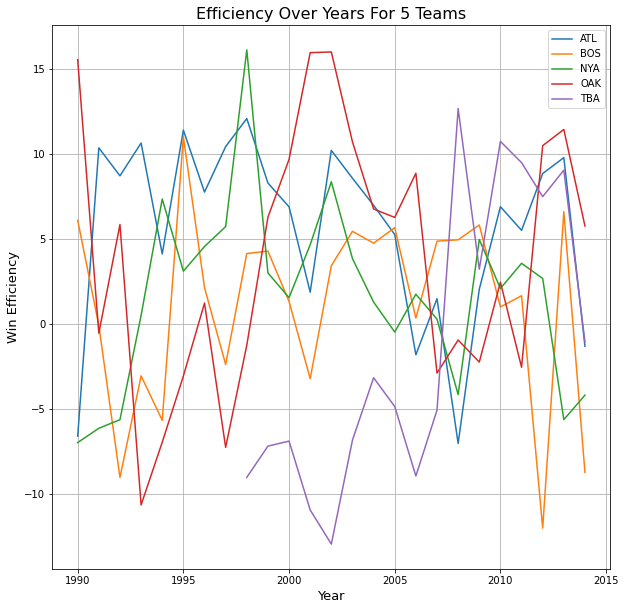

In [19]:
# only get the data that has Team_ID that is in the array teams_array then group them by Team_ID and put it in new dataframe "teams".
teams_array = ['ATL','BOS', 'NYA', 'OAK', 'TBA']
teams = teams_winning_payroll.loc[teams_winning_payroll['Team_ID'].isin(teams_array)].groupby(['Team_ID'])

x_pos = []
y_pos = []
fig, ax = plt.subplots(figsize=(10,10))
# Iterate through the teams
for i, gp in teams:
    team_year = []
    team_eff = []
    # group the teams by year
    for i2, gp2 in gp.groupby(['Year']):
        # add the mean for each of year and efficiency to the arrays
        team_year.append(gp2['Year'].mean())
        team_eff.append(gp2['Efficiency'].mean())
    ax.grid()
    x_pos.append(team_year)
    y_pos.append(team_eff)
    
# Set title and labels
ax.set_title('Efficiency Over Years For 5 Teams', fontsize=16)
ax.set_ylabel('Win Efficiency', fontsize=13)
ax.set_xlabel('Year', fontsize=13)
    
# Plot the lines
for i in range(5):
    plt.plot(x_pos[i], y_pos[i], label=teams_array[i])
    
plt.legend()
plt.show()

Line plot of efficiency over year for teams: Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay.

### **Question 4**
One main differe between this plot and the previous plots in quesionts 2 and 3 is that in this plot we have the plot of spending efficiency which is very useful for interpretation and actually analysing the data. In the other two questions we saw the spending of each team vs their winning percentage which can be very useful in certain circumstances, but the efficiency is way more helpful in drawing conclusions by looking at the plot.

One fact for sure that we can say by analysing the plots from both questions 2 and 3 we can say that money does play a huge role in the winning rate, but winning effieciency is also extremely important in the real world for teams to thrive by spending less and getting good results. We can see that teams such as Oakland have spent very efficiently, specially since the year 2000 based on the plots.